In [1]:
import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [2]:
trial = "instanceType"
df, spec = dataset.load(bucket="perfd", 
                  app_name="nginx",
                  trial=trial)
df = dataset_tool.add_ins_feature(df, "serverInstanceType")
with pd.option_context('display.max_rows', None, 'display.max_columns',None):
    display(df.sort_values("serverInstanceType"))

,level_0,index,numServerInstance,numClientInstance,serverInstanceType,clientInstanceType,fileSize,reqRate,numWorkerProc,numConn,duration,numClientThread,debug,lat_50pc,lat_75pc,lat_99pc,rps,throughput,tenancy,Compute_Units_(ECU),GPUs,FPGAs,ECU_per_vCPU,Clock_Speed(GHz),Intel_AVX,Intel_AVX2,Intel_Turbo,Instance_Storage:_already_warmed-up,Instance_Storage:_SSD_TRIM_Support,EBS_Optimized:_Max_Bandwidth,EBS_Optimized:_Throughput,EBS_Optimized:_Max_16K_IOPS,EBS_Exposed_as_NVMe,Enhanced_Networking,IPv6_Support,EBS_Optimized_surcharge,EMR_cost
96,96,96,1,1,c5.2xlarge,c5.xlarge,1000,1000,8,50,30,1,False,2.93,3.46,4.74,996.62,952.32,default,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
64,64,64,1,1,c5.2xlarge,c5.xlarge,1000,1000,8,50,30,1,False,2.89,3.33,4.30,996.68,952.32,default,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
65,65,65,1,1,c5.2xlarge,c5.xlarge,1000,1000,8,50,30,1,False,2.92,3.41,4.44,996.64,952.32,default,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
68,68,68,1,1,c5.2xlarge,c5.xlarge,1000,1000,8,50,30,1,False,2.98,3.48,4.39,996.56,952.32,default,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
70,70,70,1,1,c5.2xlarge,c5.xlarge,1000,1000,8,50,30,1,False,2.97,3.48,4.45,996.68,952.32,default,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
72,72,72,1,1,c5.2xlarge,c5.xlarge,1000,1000,8,50,30,1,False,2.99,3.46,4.36,996.61,952.32,default,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
74,74,74,1,1,c5.2xlarge,c5.xlarge,1000,1000,8,50,30,1,False,2.92,3.44,4.55,996.63,952.32,default,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
76,76,76,1,1,c5.2xlarge,c5.xlarge,1000,1000,8,50,30,1,False,2.93,3.46,4.62,996.61,952.32,default,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
78,78,78,1,1,c5.2xlarge,c5.xlarge,1000,1000,8,50,30,1,False,2.95,3.43,4.51,996.59,952.32,default,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
60,60,60,1,1,c5.2xlarge,c5.xlarge,1000,1000,8,50,30,1,False,2.82,3.31,4.27,996.60,952.32,default,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085


hyptertune: start tuning..
(59, 18) (59,)
Search took 1.13 seconds parameter settings.
Model with rank: 1
Mean validation score: -1.510 (std: 0.506)
Parameters: {'fit_intercept': True, 'normalize': True}

[('linear_regression', {'fit_intercept': True, 'normalize': True})]
hyptertune: took 1 s
hyptertune: start tuning..
(59, 18) (59,)
Search took 1.29 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.982 (std: 0.774)
Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}

[('nearest_neighbors', {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'})]
hyptertune: took 1 s
hyptertune: start tuning..
(59, 18) (59,)
Search took 9.50 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.964 (std: 0.336)
Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 1}

[('random_forest', {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'm

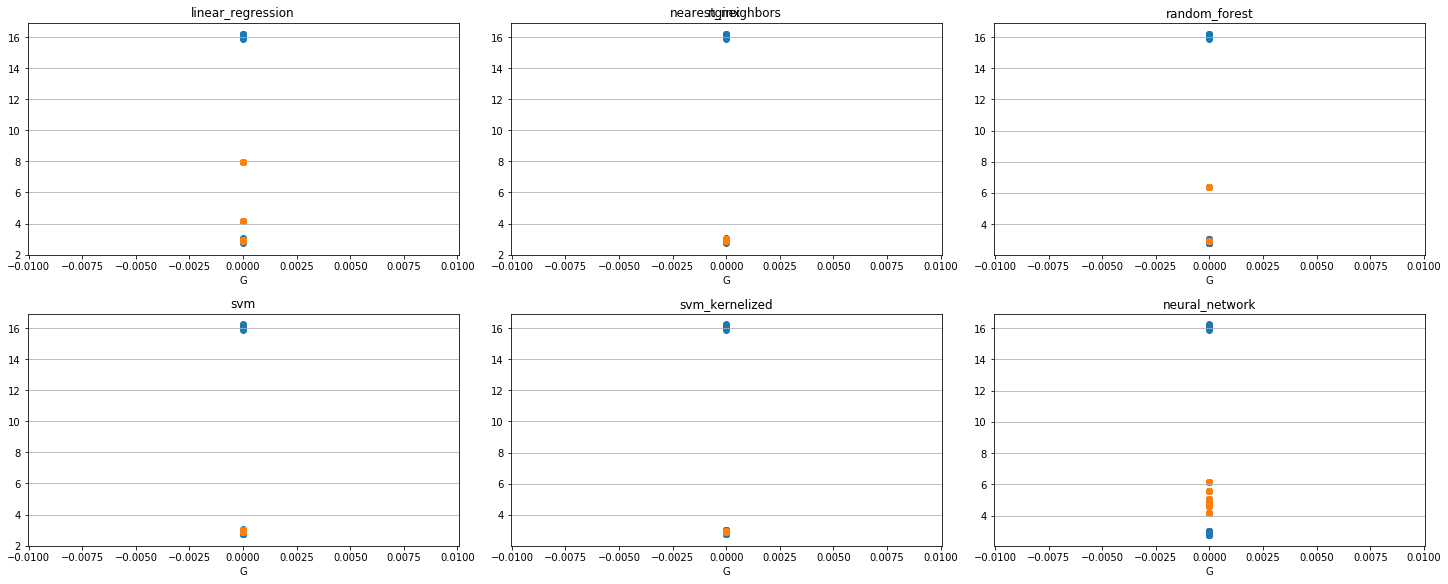

In [3]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "nginx"
ctx["feature"] = ctx["feature_mode"] = dataset_tool.get_ins_feature()
ctx["target_feature"] = "lat_50pc"
ctx["testset_ratio"] = 0.5
ctx["reload"] = True
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"nginx": df})

hyptertune: start tuning..
(57, 18) (57,)
Search took 2.37 seconds parameter settings.
Model with rank: 1
Mean validation score: -1.449 (std: 0.319)
Parameters: {'fit_intercept': True, 'normalize': True}

[('linear_regression', {'fit_intercept': True, 'normalize': True})]
hyptertune: took 2 s
hyptertune: start tuning..
(57, 18) (57,)
Search took 2.27 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.998 (std: 0.396)
Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}

[('nearest_neighbors', {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'})]
hyptertune: took 2 s
hyptertune: start tuning..
(57, 18) (57,)
Search took 10.77 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.811 (std: 0.359)
Parameters: {'bootstrap': True, 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 1}

[('random_forest', {'bootstrap': True, 'max_depth': 1, 'max_features': 'sqrt', 'm

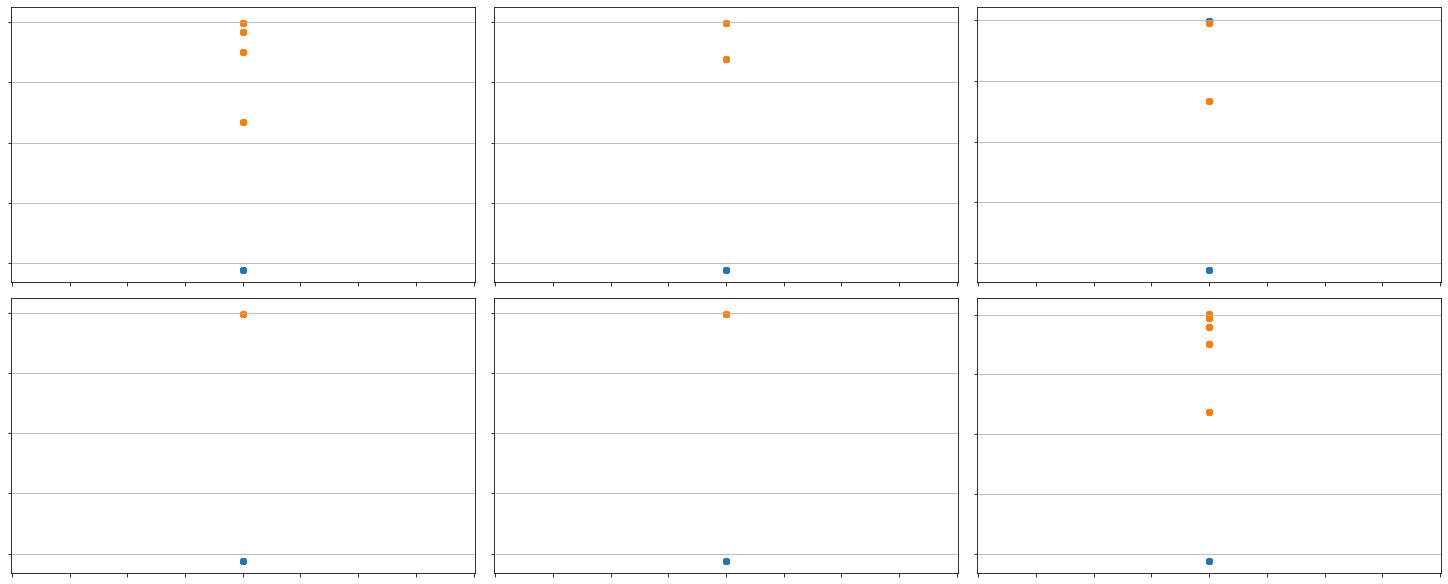

In [4]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "nginx"
ctx["feature"] = ctx["feature_mode"] = dataset_tool.get_ins_feature()
ctx["target_feature"] = "rps"
ctx["testset_ratio"] = 0.5
ctx["reload"] = True
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"nginx": df})